In [1]:
import os
import sys
sys.path.append('./misc/')

import numpy as np
from scipy.integrate import odeint

In [2]:
def fcn_LTIS(x, t, A, b, u):

    dotx = np.matmul(A, x) + np.matmul(b, u)

    return dotx

In [3]:
def fcn_simSch(t_start, T_s, finalIndex, sig_setpoint):

    #----------------------------------------------------
    # Alokacia casoveho vektora

    t_log = np.zeros([finalIndex, 1])
    t_log[0,:] = t_start

    #-----------------------------------------
    # Zaciatocne hodnoty signalov

    x_0 = np.zeros(b.shape[0])

    y_0 = np.dot(c.T, x_0.reshape(-1,1))

    e_0 = sig_setpoint[0,:] - y_0

    u_0 = par_P * e_0 + 0 + 0


    #-----------------------------------------
    # Alokacia poli pre zapis signalov (a zapisanie zaciatocnych podmienok)


    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0

    y_log = np.zeros([finalIndex, 1])
    y_log[0,:] = y_0


    #-------------

    e_log = np.zeros([finalIndex, 1])
    e_log[0,:] = e_0

    int_e_log = np.zeros([finalIndex, 1])
    int_e_log[0,:] = 0

    der_e_log = np.zeros([finalIndex, 1])
    der_e_log[0,:] = 0

    u_log = np.zeros([finalIndex, 1])
    u_log[0,:] = u_0


    #----------------------------------------------------


    timespan = np.zeros(2)
    for idx in range(1, int(finalIndex)):

        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        t_log[idx,:] = timespan[-1]

        #-----------------------------------------
        # Riadeny system

        odeOut = odeint(fcn_LTIS,
                        x_log[idx-1,:],
                        timespan,
                        args=(A, b, u_log[idx-1,:])
                        )

        x_log[idx,:] = odeOut[-1,:]

        y_log[idx,:] = np.dot(c.T, x_log[idx,:].reshape(-1,1))


        #-----------------------------------------
        # Riadiaci system

        e_log[idx,:] = sig_setpoint[idx,:] - y_log[idx,:]

        der_e_log[idx,:] = (e_log[idx,:] - e_log[idx-1,:]) / T_s

        int_e_log[idx,:] = int_e_log[idx-1,:] + e_log[idx,:] * T_s

        u_log[idx,:] = par_P * e_log[idx,:] + par_I * int_e_log[idx,:]  + par_D * der_e_log[idx,:]


    return [t_log, x_log, y_log, u_log, e_log, der_e_log, int_e_log]

In [4]:
sim_t_start = 0
sim_t_final = 10
sim_T_s = 0.001
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)


sig_setpoint = np.ones([sim_finalIndex, 1])


#-----------------------------------------
# Parametre riadeneho systemu

A = np.array([[-1]])
b = np.array([[1]])
c = np.array([[1]])

#-----------------------------------------
# Parametre riadiaceho systemu

par_P = 1
par_I = 0
par_D = 0

#-----------------------------------------

t_log, x_log, y_log, u_log, e_log, der_e_log, int_e_log, = fcn_simSch(sim_t_start, sim_T_s, sim_finalIndex, sig_setpoint)


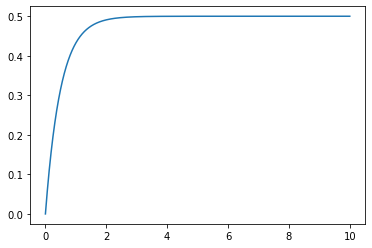

In [5]:
import matplotlib.pyplot as plt
plt.plot(t_log, y_log)